In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import stac

In [ ]:
import  scipy

In [6]:
df_pivot_tss = pd.read_csv("TSS Comparison.csv", index_col=0)

In [7]:
df_pivot_clr = pd.read_csv("CLR Comparison.csv", index_col=0)

In [8]:
df_pivot_tss

,Boosting,KNN,LogisticRegression,RandomForest,SVM
Dataset,,,,,
CDI,0.926413,0.610608,0.808150,0.897269,0.799761
CIR,0.790570,0.632182,0.572836,0.846848,0.561903
CRC1,0.627910,0.557049,0.640332,0.688225,0.650420
CRC2,0.708646,0.683071,0.753872,0.824727,0.756498
CD1,0.792779,0.683569,0.746846,0.807269,0.719420
CD2,0.813199,0.676716,0.773522,0.829721,0.713797
HIV,0.779100,0.578608,0.776487,0.716523,0.790985
IBD1,0.747769,0.735429,0.705703,0.781813,0.597802
IBD2,0.664762,0.635700,0.578515,0.689253,0.580918


In [10]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(df_pivot_tss["RandomForest"], df_pivot_clr["RandomForest"])
p

6.103515625e-05

In [11]:
stat, p = wilcoxon(df_pivot_tss["LogisticRegression"], df_pivot_clr["LogisticRegression"])
p

6.103515625e-05

In [12]:
stat, p = wilcoxon(df_pivot_tss["RandomForest"], df_pivot_clr["LogisticRegression"])
p

0.5614013671875

In [13]:
stat, p = wilcoxon(df_pivot_tss.mean(axis=1), df_pivot_clr.mean(axis=1))
p

0.05535888671875

In [14]:
data = np.asarray(df_pivot_tss)

In [15]:
data.T

array([[0.92641276, 0.7905697 , 0.62790955, 0.70864646, 0.79277885,
        0.81319902, 0.77910021, 0.74776923, 0.6647619 , 0.68791515,
        0.80642774, 0.67313016, 0.74018195, 0.78322869, 0.58635294],
       [0.61060837, 0.63218182, 0.55704869, 0.68307071, 0.68356891,
        0.67671583, 0.57860803, 0.73542857, 0.63569963, 0.54233939,
        0.80052156, 0.57026667, 0.59876534, 0.52973041, 0.56813072],
       [0.80814954, 0.57283636, 0.64033235, 0.75387205, 0.74684615,
        0.77352227, 0.77648726, 0.7057033 , 0.57851526, 0.67433939,
        0.84027389, 0.57499683, 0.63955271, 0.65191404, 0.64169935],
       [0.89726936, 0.84684848, 0.68822519, 0.82472727, 0.80726923,
        0.8297211 , 0.71652281, 0.78181319, 0.68925275, 0.81158182,
        0.86862471, 0.68983492, 0.74756551, 0.77696324, 0.60478431],
       [0.79976101, 0.56190303, 0.6504198 , 0.75649832, 0.71941987,
        0.71379731, 0.79098534, 0.5978022 , 0.58091819, 0.5133697 ,
        0.87036131, 0.47415238, 0.6172825 , 

## Multiple Comparisons Classiffiers

In [45]:
statistic, p_value, ranking, rank_cmp  = stac.friedman_test(*np.transpose(np.asarray(df_pivot_tss)))
ranks = {key: rank_cmp[i] for i, key in enumerate(list(df_pivot_tss.columns))} 

comparisons, z_values, p_values, adj_p_values = stac.finner_multitest(ranks)
adj_p_values = np.asarray(adj_p_values)
for comparison, p in zip(comparisons, adj_p_values):
    print(f"{comparison}: {p:.6f}")

KNN vs RandomForest: 0.000004
RandomForest vs SVM: 0.000693
Boosting vs KNN: 0.001147
LogisticRegression vs RandomForest: 0.009703
Boosting vs SVM: 0.041405
KNN vs LogisticRegression: 0.046623
Boosting vs RandomForest: 0.184879
Boosting vs LogisticRegression: 0.202830
KNN vs SVM: 0.223951
LogisticRegression vs SVM: 0.355611


In [46]:
models = ["KNN", "RandomForest", "SVM", "LogisticRegression", "Boosting"]

p_values = {
    ("KNN", "RandomForest"): 0.000004,
    ("RandomForest", "SVM"): 0.000693,
    ("Boosting", "KNN"): 0.001147,
    ("LogisticRegression", "RandomForest"): 0.009703,
    ("Boosting", "SVM"): 0.041405,
    ("KNN", "LogisticRegression"): 0.046623,
    ("Boosting", "RandomForest"): 0.184879,
    ("Boosting", "LogisticRegression"): 0.202830,
    ("KNN", "SVM"): 0.223951,
    ("LogisticRegression", "SVM"): 0.355611,
}

p_matrix = pd.DataFrame(np.nan, index=models, columns=models)

for (model1, model2), p_val in p_values.items():
    p_matrix.loc[model1, model2] = p_val
    p_matrix.loc[model2, model1] = p_val  # Simetría

np.fill_diagonal(p_matrix.values, 0)

In [47]:
import scikit_posthocs as sp
import matplotlib.pyplot as plt

In [48]:
colors = ranks.copy()
colors["Boosting"] = "blue"
colors["LogisticRegression"] = "grey"
colors["RandomForest"] = "red"
colors["SVM"] = "skyblue"
colors["KNN"] = "yellow"

C:\Users\ignan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


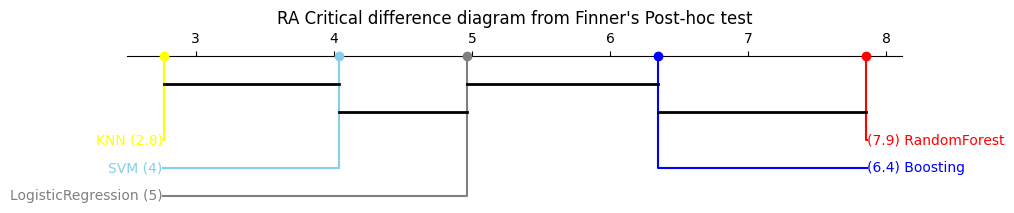

In [49]:
plt.figure(figsize=(10, 2), dpi=100)
plt.title('RA Critical difference diagram from Finner\'s Post-hoc test')
ax = sp.critical_difference_diagram(ranks, p_matrix, color_palette=colors)
plt.savefig("1.png")

In [51]:
statistic, p_value, ranking, rank_cmp  = stac.friedman_test(*np.transpose(np.asarray(df_pivot_clr)))
ranks = {key: rank_cmp[i] for i, key in enumerate(list(df_pivot_clr.columns))} 

comparisons, z_values, p_values, adj_p_values = stac.finner_multitest(ranks)
adj_p_values = np.asarray(adj_p_values)
for comparison, p_value in zip(comparisons, adj_p_values):
    print(f"{comparison}: {p_value:.6f}")

KNN vs LogisticRegression: 0.000001
LogisticRegression vs RandomForest: 0.000057
KNN vs SVM: 0.000462
Boosting vs KNN: 0.006687
RandomForest vs SVM: 0.011136
Boosting vs LogisticRegression: 0.025393
Boosting vs RandomForest: 0.070163
LogisticRegression vs SVM: 0.130658
KNN vs RandomForest: 0.325808
Boosting vs SVM: 0.418923


In [52]:
models = ["KNN", "RandomForest", "SVM", "LogisticRegression", "Boosting"]

p_values = {
    ("KNN", "RandomForest"): 0.325808,
    ("RandomForest", "SVM"): 0.011136,
    ("Boosting", "KNN"): 0.006687,
    ("LogisticRegression", "RandomForest"): 0.000057,
    ("Boosting", "SVM"): 0.418923,
    ("KNN", "LogisticRegression"): 0.000001,
    ("Boosting", "LogisticRegression"): 0.025393,
    ("Boosting", "RandomForest"): 0.070163,
    ("KNN", "SVM"): 0.000462,
    ("LogisticRegression", "SVM"): 0.130658,
}

p_matrix = pd.DataFrame(np.nan, index=models, columns=models)

for (model1, model2), p_val in p_values.items():
    p_matrix.loc[model1, model2] = p_val
    p_matrix.loc[model2, model1] = p_val  # Simetría
np.fill_diagonal(p_matrix.values, 0)

print(p_matrix)


                         KNN  RandomForest       SVM  LogisticRegression  \
KNN                 0.000000      0.325808  0.000462            0.000001   
RandomForest        0.325808      0.000000  0.011136            0.000057   
SVM                 0.000462      0.011136  0.000000            0.130658   
LogisticRegression  0.000001      0.000057  0.130658            0.000000   
Boosting            0.006687      0.070163  0.418923            0.025393   

                    Boosting  
KNN                 0.006687  
RandomForest        0.070163  
SVM                 0.418923  
LogisticRegression  0.025393  
Boosting            0.000000  


C:\Users\ignan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


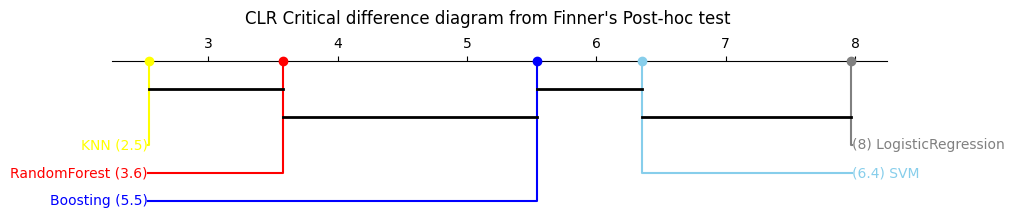

In [55]:
plt.figure(figsize=(10, 2), dpi=100)

plt.suptitle('CLR Critical difference diagram from Finner\'s Post-hoc test', y=1.1)

ax = sp.critical_difference_diagram(ranks, p_matrix, color_palette=colors)

plt.plot()
plt.savefig("2.png", bbox_inches='tight', dpi=100)


## Feature Selections Multiple Comparison

In [60]:
stacked_lr = pd.read_csv("LRComparison.csv", index_col=0)

In [61]:
stacked_lr

,AE100,AE50,LASSO,MIFS100,MIFS50,Relief100,Relief50,VAE,MRMR100,MRMR50
Dataset,,,,,,,,,,
CDI,0.887803,0.886947,0.915209,0.912416,0.904874,0.910729,0.912310,0.861704,0.902217,0.896769
CIR,0.660218,0.654158,0.810267,0.731770,0.694188,0.741006,0.747909,0.523345,0.824485,0.837139
CRC1,0.667454,0.681677,0.647013,0.618885,0.614397,0.684868,0.683047,0.658378,0.702203,0.711208
CRC2,0.786232,0.820616,0.760566,0.755017,0.740310,0.745246,0.724936,0.718848,0.757495,0.750411
CD1,0.788491,0.777017,0.796846,0.785208,0.785657,0.744542,0.742394,0.727660,0.806936,0.786494
CD2,0.837954,0.837238,0.821515,0.826850,0.837050,0.818357,0.815439,0.856854,0.845887,0.852462
HIV,0.740449,0.707906,0.833630,0.729947,0.719359,0.693568,0.698680,0.609157,0.727023,0.736391
IBD1,0.807714,0.791077,0.865253,0.761857,0.751231,0.795956,0.806527,0.714813,0.822549,0.818011
IBD2,0.619651,0.641272,0.684200,0.699788,0.694234,0.678310,0.664708,0.651150,0.697919,0.696098


In [72]:
statistic, p_value, ranking, rank_cmp  = stac.friedman_test(*np.transpose(np.asarray(stacked_lr)))
ranks = {key: rank_cmp[i] for i, key in enumerate(list(stacked_lr.columns))} 
comparisons, z_values, p_values, adj_p_values = stac.finner_multitest(ranks)
adj_p_values = np.asarray(adj_p_values)
for comparison, p_value in zip(comparisons, adj_p_values):
    print(f"{comparison}: {p_value:.6f}")

VAE vs MRMR100: 0.000115
MIFS50 vs MRMR100: 0.000418
LASSO vs VAE: 0.001704
VAE vs MRMR50: 0.001704
Relief50 vs MRMR100: 0.002110
LASSO vs MIFS50: 0.004399
MIFS50 vs MRMR50: 0.004703
Relief100 vs MRMR100: 0.005114
AE50 vs MRMR100: 0.012778
MIFS100 vs MRMR100: 0.012778
AE100 vs VAE: 0.018660
LASSO vs Relief50: 0.018660
Relief50 vs MRMR50: 0.019042
LASSO vs Relief100: 0.042502
AE100 vs MIFS50: 0.046833
Relief100 vs MRMR50: 0.046833
AE50 vs LASSO: 0.077312
LASSO vs MIFS100: 0.077312
AE50 vs MRMR50: 0.080486
MIFS100 vs MRMR50: 0.080486
AE100 vs MRMR100: 0.127310
AE100 vs Relief50: 0.138783
AE50 vs VAE: 0.170860
MIFS100 vs VAE: 0.170860
AE100 vs Relief100: 0.250190
Relief100 vs VAE: 0.268783
AE50 vs MIFS50: 0.318303
MIFS100 vs MIFS50: 0.318303
AE100 vs AE50: 0.362590
AE100 vs MIFS100: 0.362590
AE100 vs LASSO: 0.410678
Relief50 vs VAE: 0.410678
AE100 vs MRMR50: 0.426246
MIFS50 vs Relief100: 0.426246
MRMR100 vs MRMR50: 0.443075
LASSO vs MRMR100: 0.470326
AE50 vs Relief50: 0.577035
MIFS100 vs 

In [75]:
methods = [
    "VAE", "MRMR100", "AE100", "MRMR50", "MIFS50", 
    "LASSO", "Relief50", "MIFS100", "Relief100", "AE50"
]

p_values = {
    ("VAE", "MRMR100"): 0.000115,
    ("MIFS50", "MRMR100"): 0.000418,
    ("LASSO", "VAE"): 0.001704,
    ("VAE", "MRMR50"): 0.001704,
    ("Relief50", "MRMR100"): 0.002110,
    ("LASSO", "MIFS50"): 0.004399,
    ("MIFS50", "MRMR50"): 0.004703,
    ("Relief100", "MRMR100"): 0.005114,
    ("AE50", "MRMR100"): 0.012778,
    ("MIFS100", "MRMR100"): 0.012778,
    ("AE100", "VAE"): 0.018660,
    ("LASSO", "Relief50"): 0.018660,
    ("Relief50", "MRMR50"): 0.019042,
    ("LASSO", "Relief100"): 0.042502,
    ("AE100", "MIFS50"): 0.046833,
    ("Relief100", "MRMR50"): 0.046833,
    ("AE50", "LASSO"): 0.077312,
    ("LASSO", "MIFS100"): 0.077312,
    ("AE50", "MRMR50"): 0.080486,
    ("MIFS100", "MRMR50"): 0.080486,
    ("AE100", "MRMR100"): 0.127310,
    ("AE100", "Relief50"): 0.138783,
    ("AE50", "VAE"): 0.170860,
    ("MIFS100", "VAE"): 0.170860,
    ("AE100", "Relief100"): 0.250190,
    ("Relief100", "VAE"): 0.268783,
    ("AE50", "MIFS50"): 0.318303,
    ("MIFS100", "MIFS50"): 0.318303,
    ("AE100", "AE50"): 0.362590,
    ("AE100", "MIFS100"): 0.362590,
    ("AE100", "LASSO"): 0.410678,
    ("Relief50", "VAE"): 0.410678,
    ("AE100", "MRMR50"): 0.426246,
    ("MIFS50", "Relief100"): 0.426246,
    ("MRMR100", "MRMR50"): 0.443075,
    ("LASSO", "MRMR100"): 0.470326,
    ("AE50", "Relief50"): 0.577035,
    ("MIFS100", "Relief50"): 0.577035,
    ("MIFS50", "Relief50"): 0.598440,
    ("MIFS50", "VAE"): 0.715583,
    ("Relief100", "Relief50"): 0.750268,
    ("AE50", "Relief100"): 0.786184,
    ("MIFS100", "Relief100"): 0.786184,
    ("LASSO", "MRMR50"): 0.955120,
    ("AE50", "MIFS100"): 1.000000,
}


p_matrix = pd.DataFrame(np.nan, index=methods, columns=methods)


for (method1, method2), p_val in p_values.items():
    p_matrix.loc[method1, method2] = p_val
    p_matrix.loc[method2, method1] = p_val  # Simetría


np.fill_diagonal(p_matrix.values, 0)


print(p_matrix)


                VAE   MRMR100     AE100    MRMR50    MIFS50     LASSO  \
VAE        0.000000  0.000115  0.018660  0.001704  0.715583  0.001704   
MRMR100    0.000115  0.000000  0.127310  0.443075  0.000418  0.470326   
AE100      0.018660  0.127310  0.000000  0.426246  0.046833  0.410678   
MRMR50     0.001704  0.443075  0.426246  0.000000  0.004703  0.955120   
MIFS50     0.715583  0.000418  0.046833  0.004703  0.000000  0.004399   
LASSO      0.001704  0.470326  0.410678  0.955120  0.004399  0.000000   
Relief50   0.410678  0.002110  0.138783  0.019042  0.598440  0.018660   
MIFS100    0.170860  0.012778  0.362590  0.080486  0.318303  0.077312   
Relief100  0.268783  0.005114  0.250190  0.046833  0.426246  0.042502   
AE50       0.170860  0.012778  0.362590  0.080486  0.318303  0.077312   

           Relief50   MIFS100  Relief100      AE50  
VAE        0.410678  0.170860   0.268783  0.170860  
MRMR100    0.002110  0.012778   0.005114  0.012778  
AE100      0.138783  0.362590   0.250

C:\Users\ignan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


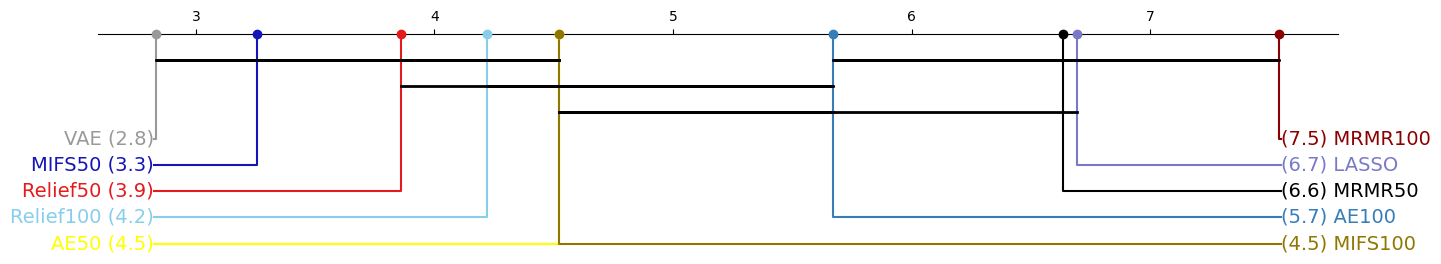

In [76]:
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# Crear la figura
plt.figure(figsize=(16, 3), dpi=100)

algorithm_colors = {
    "LASSO": "#7979c7",         # Azul
    "AE50": "yellow",          # Naranja
    "AE100": "#377eb8",         # Gris
    "VAE": "#999999",           # Rojo
    "MRMR50": "#000000",        # Celeste claro
    "MRMR100": "#8b0000",       # Azul oscuro
    "MIFS50": "#1414b8",        # Verde claro
    "MIFS100": "#8f7700",       # Verde oscuro
    "Relief50": "#e41a1c",      # Rojo claro
    "Relief100": "#87CEEB",     # Púrpura
}
label_props = {"fontsize": 14}  

ax = sp.critical_difference_diagram(ranks, p_matrix, color_palette=algorithm_colors, label_props=label_props)
plt.savefig("5.png")